In [30]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

In [12]:
# open data
path = '/home/charlieowen/Documents/ChaosClocksComputerVision/ProcessedVideo/'   

d = {}

for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'rb') as fh:
    #d["data{0}".format(filename)] = pickle.load(f)
        d["data{0}".format(filename)] = pickle.load(fh)

In [23]:
f = open(os.path.join(path, 'DSC_0020.txt'))
data = pickle.load(f)

# pagackes data as ditionary {color: time, x, y}
organized_data = {'red': {'t': [], 'x': [], 'y': []}, 'green': {'t': [], 'x': [],
'y': []}, 'blue': {'t': [], 'x': [], 'y': []}, 'yellow': {'t': [], 'x': [], 'y': []}}

# Organize Data
#data = ["data{0}".format(filename)]
#for  data in os.listdir(path):
for i in data:
    color = i[0]
    center = i[1]
    x = center[0]
    y = center[1]
    t = i[2]

    t_list = organized_data.get(color)['t']
    x_list = organized_data.get(color)['x']
    y_list = organized_data.get(color)['y']

    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

    organized_data[color] = {'t': t_list, 'x': x_list, 'y': y_list}


def calculate_angle(data, color1, color2):
    t1_list = data[color1]['t']
    t2_list = data[color2]['t']
    x1_list = data[color1]['x']
    x2_list = data[color2]['x']
    y1_list = data[color1]['y']
    y2_list = data[color2]['y']

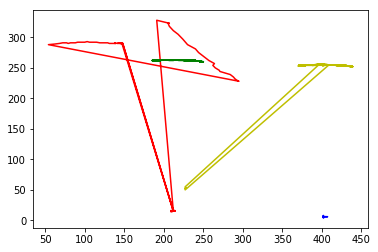

In [26]:
plt.plot(organized_data['yellow']['x'], organized_data['yellow']['y'], 'y')
plt.plot(organized_data['blue']['x'], organized_data['blue']['y'], 'b')
plt.plot(organized_data['red']['x'], organized_data['red']['y'], 'r')
plt.plot(organized_data['green']['x'], organized_data['green']['y'], 'g')
plt.show()

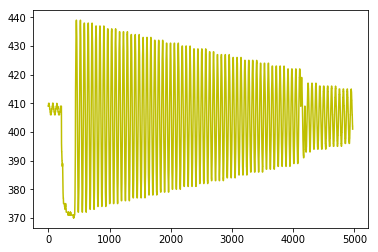

In [35]:
def reject_outliers(data):
    m = 2
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered_x = reject_outliers(organized_data['yellow']['x'])
time = np.linspace(0, len(filtered_y), len(filtered_x))

plt.plot(time, filtered_x, 'y')
plt.show()